# Importing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/mars/RudolphineTables.csv", index_col = "index")
df

,ANOMALIA COEQUATA,INTERVALLU
index,,
0,0.0.0,166465
1,0.54.41,166462
2,1.49.22,166456
3,2.44.3,166446
4,3.38.44,166431
...,...,...
176,175.36.39,138269
177,176.42.29,138254
178,177.48.19,138244


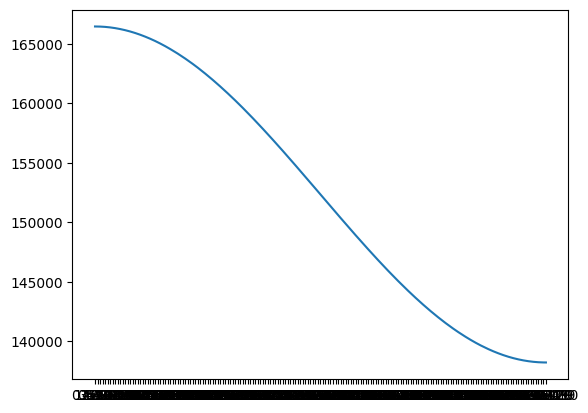

In [3]:
import matplotlib.pyplot as plt
plt.plot(df["ANOMALIA COEQUATA"].values, df["INTERVALLU"].values)

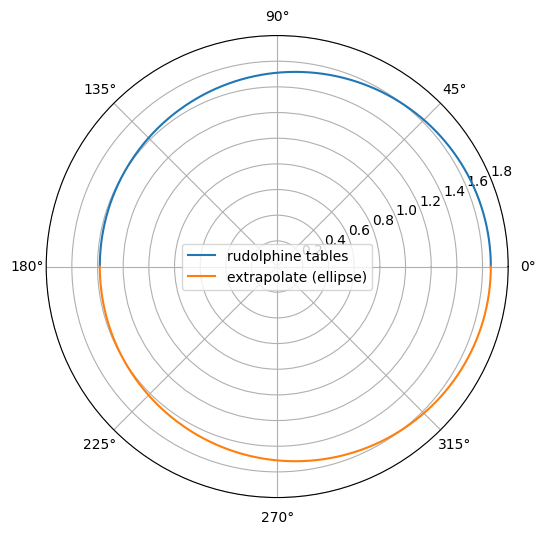

In [4]:
def dsm_to_deg(s):
  value0 = s.find(".")
  value1 = s[value0+1:].find(".")
  return float(s[:value0]) + float(s[value0+1:value0+value1+1])/60 + float(s[value0+value1+2:])/3600

longitudinal_data = np.asarray(list(map(dsm_to_deg,df["ANOMALIA COEQUATA"].values)))/360*2*np.pi
radius_data = df["INTERVALLU"].values/100000

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='polar')
c = ax.plot(longitudinal_data, radius_data, label = "rudolphine tables")
c = ax.plot(longitudinal_data*-1, radius_data, label = "extrapolate (ellipse)")
ax.set_ylim(0,1.8)
plt.legend()

In [5]:
# what value of eccentricity does the data suggest?
from scipy.optimize import curve_fit
import numpy as np

def ecc(theta, p, e): #try to fit p and e
  return p/(1-e*np.cos(theta))

values,cov = curve_fit(ecc, longitudinal_data, radius_data, p0 = [150000, 0.1]) # requires good initialisation points
print(values)

#from https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#recognised orbit eccentricitty is 0.0935 
#recognised semimajor axis is 1.5266 
#note that the value of eccentricity we get is negative because of the setup of the ellipse

[1.51042379 0.09264712]


In [ ]:
# average percentage error in fitting the eccentricity and semimajor axis
# the loss in using this formula to fit the data is 
result = ecc(longitudinal_data, values[0], values[1])
pcterror = (np.abs(result - radius_data)/radius_data)
print(np.mean(pcterror))

5.13333352231232e-06


In [ ]:
rmin = values[0]/(1+values[1])
rmax = values[0]/(1-values[1])
semimajoraxis = values[0]/(1-values[1]**2)
semiminoraxis = values[0]/np.sqrt(1-values[1]**2)

print(rmin, rmax, semimajoraxis,semiminoraxis)

1.664648705111805 1.3823527850094552 1.5235007450606302 1.51694817761639


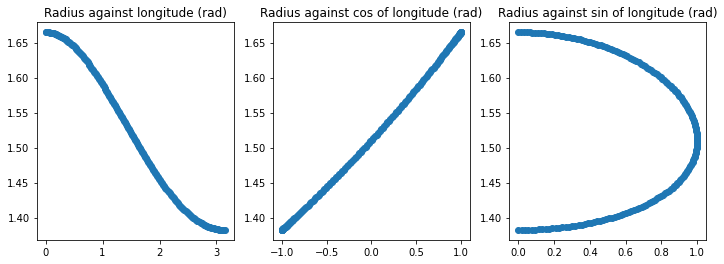

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))
ax1.scatter(longitudinal_data, radius_data)
ax1.set_title("Radius against longitude (rad)")
ax2.scatter(np.cos(longitudinal_data), radius_data)
ax2.set_title("Radius against cos of longitude (rad)")
ax3.scatter(np.sin(longitudinal_data), radius_data)
ax3.set_title("Radius against sin of longitude (rad)")
plt.show()

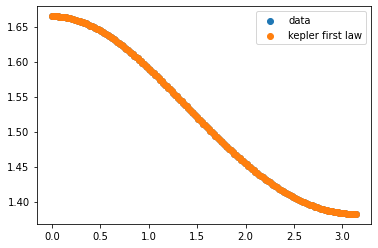

In [ ]:
plt.scatter(longitudinal_data, radius_data, label = "data")
plt.scatter(longitudinal_data, ecc(longitudinal_data, values[0], values[1]), label = "kepler first law")
plt.legend()
plt.show()
# this shows that kepler's first law doesnt fit well

# Importing AI Feynman

In [ ]:
!git clone https://github.com/zykhoo/AI-Feynman.git 

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 78 (delta 5), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (78/78), 14.32 MiB | 8.36 MiB/s, done.


In [ ]:
import matplotlib.pyplot as plt
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi

!lsb_release -a

!python3 --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal
Python 3.9.16


Look at what we downloaded

In [ ]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

aifeynman     examples	MANIFEST.in  requirements.txt  setup.py
example_data  LICENSE	README.md    setup.cfg


Fix broken requirements file (may not be needed if later versions fix this).

In [ ]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [ ]:
!pip install -r AI-Feynman/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


Check that fortran is installed

In [ ]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [ ]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 1s (336 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 128275 files and directories currently installed.)

Set loose permissions to avoid some reported file permissions issues

In [ ]:
!chmod +777 /content/AI-Feynman/aifeynman/*

Compile the fortran code

Look at the code directory

In [ ]:
!ls -l /content/AI-Feynman/aifeynman

total 1304
-rwxrwxrwx 1 root root     11 Mar 15 10:49 10ops.txt
-rwxrwxrwx 1 root root     15 Mar 15 10:49 14ops.txt
-rwxrwxrwx 1 root root     19 Mar 15 10:49 19ops.txt
-rwxrwxrwx 1 root root      8 Mar 15 10:49 7ops.txt
-rwxrwxrwx 1 root root 960508 Mar 15 10:49 arity2templates.txt
-rwxrwxrwx 1 root root   4297 Mar 15 10:49 dimensionalAnalysis.py
-rwxrwxrwx 1 root root    952 Mar 15 10:49 get_demos.py
-rwxrwxrwx 1 root root   6168 Mar 15 10:49 get_pareto.py
-rwxrwxrwx 1 root root   1745 Mar 15 10:49 getPowers.py
-rwxrwxrwx 1 root root    247 Mar 15 10:49 __init__.py
-rwxrwxrwx 1 root root    155 Mar 15 10:49 resources.py
-rwxrwxrwx 1 root root   2395 Mar 15 10:49 RPN_to_eq.py
-rwxrwxrwx 1 root root   5205 Mar 15 10:49 RPN_to_pytorch.py
-rwxrwxrwx 1 root root   5383 Mar 15 10:49 S_add_bf_on_numbers_on_pareto.py
-rwxrwxrwx 1 root root   7908 Mar 15 10:49 S_add_snap_expr_on_pareto.py
-rwxrwxrwx 1 root root    990 Mar 15 10:49 S_add_sym_on_pareto.py
-rwxrwxrwx 1 root root   1540 Mar 15 1

Compile .f files into .x files

In [ ]:
import os
os.chdir("/content/AI-Feynman/") #&& ./compile.sh
!ls
!python3 /content/AI-Feynman/setup.py install


Streaming output truncated to the last 5000 lines.
aifeynman/symbolic_regress2.f90:197:1:

  197 |    arity = arities(i)
      | 1
aifeynman/symbolic_regress2.f90:198:1:

  198 |    op = ops(i:i)
      | 1
aifeynman/symbolic_regress2.f90:199:1:

  199 |    if (arity.eq.0) then ! This is a nonary function
      | 1
aifeynman/symbolic_regress2.f90:200:1:

  200 |      if (op.eq."0") then
      | 1
aifeynman/symbolic_regress2.f90:202:1:

  202 |      else if (op.eq."1") then
      | 1
aifeynman/symbolic_regress2.f90:203:1:

  203 |        y = 1.
      | 1
aifeynman/symbolic_regress2.f90:204:1:

  204 |      else if (op.eq."P") then
      | 1
aifeynman/symbolic_regress2.f90:205:2:

  205 |         y = 4.*atan(1.) ! pi
      |  1
aifeynman/symbolic_regress2.f90:207:5:

  207 |            y = x(ichar(op)-96)
      |     1
aifeynman/symbolic_regress2.f90:208:1:

  208 |      end if
      | 1
aifeynman/symbolic_regress2.f90:209:1:

  209 |    else if (arity.eq.1) then ! This is a unary functio

# Creating the dataset for AI Feynman and running AI Feynman

## Attempt 2 with only longitude

In [ ]:
data_original = pd.DataFrame()
data_original['longi'] = longitudinal_data
data_original['e'] = values[1]
data_original['p'] = values[0]
data_original['radius'] = radius_data
data_original = data_original.sample(frac=1).reset_index(drop=True)


np.savetxt('/content/AI-Feynman/example_data/mars_longi.txt', data_original[["longi", "radius"]].values)
np.loadtxt('/content/AI-Feynman/example_data/mars_longi.txt')

array([[1.10226269, 1.57637   ],
       [1.75970398, 1.48461   ],
       [1.30562748, 1.548     ],
       [1.7954299 , 1.4799    ],
       [2.28834482, 1.4237    ],
       [2.81647175, 1.38852   ],
       [1.81333407, 1.47756   ],
       [0.52730275, 1.64187   ],
       [1.61797355, 1.50386   ],
       [2.68326434, 1.39456   ],
       [1.39147344, 1.5358    ],
       [1.5128417 , 1.51857   ],
       [2.8737137 , 1.38654   ],
       [0.3186341 , 1.65613   ],
       [2.53187158, 1.40381   ],
       [0.57573564, 1.63769   ],
       [2.14033605, 1.43857   ],
       [1.32274141, 1.54557   ],
       [1.70632599, 1.49175   ],
       [2.04862384, 1.44871   ],
       [2.91191702, 1.38544   ],
       [0.93549648, 1.5983    ],
       [0.03181347, 1.66456   ],
       [0.73819186, 1.62155   ],
       [0.33462325, 1.65527   ],
       [0.72187303, 1.62331   ],
       [1.90329125, 1.4661    ],
       [1.06871843, 1.5809    ],
       [0.77088769, 1.61794   ],
       [0.91894494, 1.60039   ],
       [2.

In [ ]:
import os
os.chdir("/content/AI-Feynman/")
print(os.getcwd())

/content/AI-Feynman


In [ ]:
from aifeynman.S_brute_force import brute_force
brute_force("/content/AI-Feynman/example_data/","mars_longi.txt",30,"14ops.txt")

/content/AI-Feynman/example_data/ mars_longi.txt
Trying to solve mysteries with brute force...
Trying to solve /content/AI-Feynman/example_data/mars_longi.txt


In [ ]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("/content/AI-Feynman/example_data/","mars_longi.txt",30,"19ops.txt", polyfit_deg=3, NN_epochs=400)
end = time.time()

Checking for brute force + 

/content/AI-Feynman/example_data/ mars_longi.txt_train
Trying to solve mysteries with brute force...
Trying to solve /content/AI-Feynman/example_data/mars_longi.txt_train
1A added  49.210034423474724 26.05215757848752 -1.627932741013+pi
1A added  49.210034423474724 26.05215757848752 -2.627932741013+(pi+1)
1A added  53.424847130175394 22.916672544057285 1.119586735536+((x0+1))**(-1)
1A added  56.919422040103186 22.601438935064355 1.330924480231+((exp(x0)+1))**(-1)
1A added  56.016045710676906 22.255219043023594 0.843327485411+(pi/(x0+pi))
1A added  56.016045710676906 22.255219043023512 0.843327485411+(((x0/pi)+1))**(-1)
1A added  68.29188528456478 21.697545994869685 0.806728120766+sqrt(atan(cos(atan(x0))))
1A added  65.61747988376118 21.69961885875584 1.516464316821+(cos(x0)*(log(pi)-1))
1A added  60.7160243283533 21.618622840119976 1.515076378891+(cos(x0)*log(log(pi)))
1A added  68.33974745760418 21.235391649322043 1.667881306487+(sin(atan(x0))-atan(x0))
1A

In [ ]:
print(end-start)

748.0412933826447


In [ ]:
!cat /content/AI-Feynman/results/solution_mars_longi.txt

30.603876619387265 4.877634521402261 882.8518483738093 0.0 29.39776397887043 1/(666.000000000000+(sin(pi))**(-1))
26.13544653324745 4.710711646018068 852.6388079292703 3.0 26.185779490265933 1.50000000000000
26.104591014980727 4.710521595738309 852.604408828634 4.0 26.182330191003473 pi/2
26.255987011632588 4.7103016484146405 852.56459836305 11.972261848733291 26.178338845406735 1.65306122448980
25.0713593416923 4.642487895401309 840.2903090676368 23.720671786825555 24.976300505747176 1.66666666666667 - 0.09*x0**2
24.910394550196305 4.639559757290486 839.7603160695779 33.809312819273174 24.925659248980946 (2.78 - 0.26*x0**2)**0.5
23.5921356122244 4.559301992372138 825.2336606193569 36.12617154448214 23.576897694477786 acos(-0.02*x0**3 + 0.09*x0**2 - 0.1)
22.52264307361704 4.49181349197224 813.0182420469755 37.7043779794849 22.499382346382234 1/(-0.01*x0**3 + 0.04*x0**2 + 0.6)
22.243261970482052 4.47327149797732 809.6621411338949 43.73350185823175 22.21206315597542 (0.01*x0**3 - 0.04*x0

In [ ]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error
get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/mars_longi.txt"),"0.02*x0**3 - 0.09*x0**2 - 0.01*x0 + 1.67")

20.237634595630965

Equation 5: 1.66666666666667 - 0.09*x0**2
Equation 6: (2.78 - 0.26*x0**2)**0.5
Equation 7: np.arccos(-0.02*x0**3 + 0.09*x0**2 - 0.1)
Equation 8: 1/(-0.01*x0**3 + 0.04*x0**2 + 0.6)
Equation 9: (0.01*x0**3 - 0.04*x0**2 + 1.29)**2
Equation 10: np.arccos(-0.02*x0**3 + 0.09*x0**2 + 0.01*x0 - 0.1)
Equation 11: np.log(0.09*x0**3 - 0.38*x0**2 - 0.111111111111111*x0 + 5.3)
Equation 12: 0.02*x0**3 - 0.09*x0**2 - 0.01*x0 + 1.67


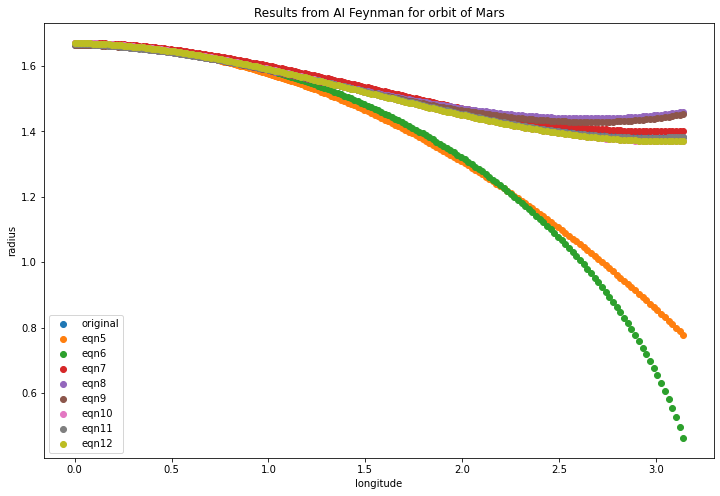

In [ ]:
plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
plt.scatter(data_original['longi'],data_original['radius'], label = "original")
with open("/content/AI-Feynman/results/solution_mars_longi.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation) & ("np.pi" not in equation) or ("x1" in equation) or ("x2" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","data_original['longi'].values")
      equation = equation.replace("x1","data_original['e'].values")
      equation = equation.replace("x2","data_original['p'].values")
      try: 
            output = list(eval(equation))
            plt.scatter(data_original['longi'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else: 
      continue
      
# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.xlabel("longitude")
plt.ylabel("radius")
plt.show()

1 & $1/(666.000000000000+(sin(pi))^(-1))$ & 2.33 & 30.604
2 & $1.50000000000000$ & 0.0106 & 26.186
3 & $pi/2$ & 0.0123 & 26.186
4 & $1.65306122448980$ & 0.0268 & 26.178
5 & $1.66666666666667 - 0.09\times x_0^2$ & 0.048 & 24.976
6 & $(2.78 - 0.26\times x_0^2)^0.5$ & 0.0767 & 24.926
7 & $acos(-0.02\times x_0^3 + 0.09\times x_0^2 - 0.1)$ & 0.000169 & 23.577
8 & $1/(-0.01\times x_0^3 + 0.04\times x_0^2 + 0.6)$ & 0.000706 & 22.515
9 & $(0.01\times x_0^3 - 0.04\times x_0^2 + 1.29)^2$ & 0.000458 & 22.273
10 & $acos(-0.02\times x_0^3 + 0.09\times x_0^2 + 0.01\times x_0 - 0.1)$ & 4.7e-05 & 21.356
11 & $log(0.09\times x_0^3 - 0.38\times x_0^2 - 0.111111111111111\times x_0 + 5.3)$ & 1.07e-05 & 20.841
12 & $0.02\times x_0^3 - 0.09\times x_0^2 - 0.01\times x_0 + 1.67$ & 4.41e-05 & 20.238


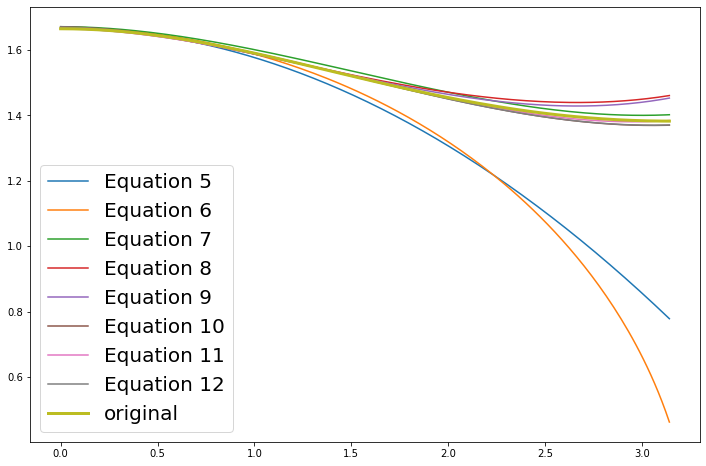

In [ ]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
def pretty_print_eqn(s):
  return s.replace("\n", "").replace("x0", "x_0").replace("x1", "x_1").replace("**", "^").replace("*", "\\times ")

with open("/content/AI-Feynman/results/solution_mars_longi.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    eq = replace_equations(equation.replace("\n", ""))
    if ("x0" in eq) & ("np.pi" not in eq) or ("x1" in eq) or ("x2" in eq):
      eq = eq.replace("x0","longitudinal_data") # radius_data
      eq = eq.replace("x1","data_original['e'].values")
      eq = eq.replace("x2","data_original['p'].values")
      try: 
            output = list(eval(eq))
            plt.plot(longitudinal_data,
                    output, label = "Equation %s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/mars_longi.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
    else: 
      try: 
            output = [float(eval(eq))]*len(radius_data)
            # plt.plot(data_original['longi'],
            #         output, label = "eqn%s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/mars_longi.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
      continue

plt.plot(longitudinal_data, radius_data, label = "original", linewidth=3)   
# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend(fontsize=20)
# plt.title("Results from AI Feynman for orbit of Mars")
# plt.xlabel("longitude")
# plt.ylabel("radius")
plt.show()